<a href="https://colab.research.google.com/github/fatemehes75/Clustring_problems/blob/main/DBSCN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCN
Density-Based Clustering
It is a clustering methos that can be used to group data without supervision. It can be applied to tasks with arbitrary shape clusters.
Elements in the same cluster that do not have enough similarity may be poor. Density-based clustering locates regions of high density that are separated from one another by regions of low density. 

1.   Radius = Dist that includes enough number of points 
2.   M = Min number of data points in neighbour 



In [1]:
import numpy as np  
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs  
x, y = make_blobs(n_samples=1500, centers= [[4,3], [2,-1], [-1,4]])

In [21]:
from sklearn.cluster import DBSCAN 
Radius = 0.3
m = 6
db = DBSCAN(eps = Radius, min_samples = m).fit(x)
labels = db.labels_
labels

array([ 0,  0,  1, ...,  2, -1,  2])

In [28]:
# Number of clusters(exclude outliner (-1))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

6

In [29]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5}

In [30]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

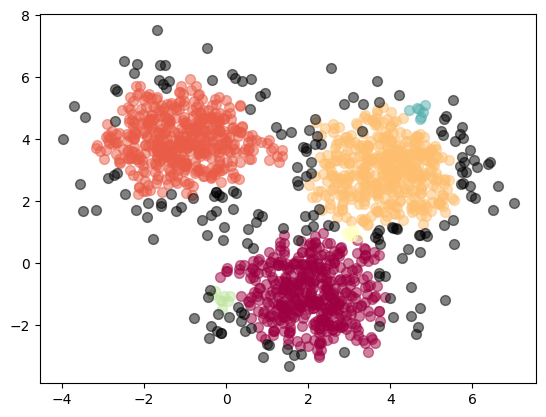

In [34]:
#Plot the points with colors
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
for i, col in zip(unique_labels, colors):
    if i == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == i)

    # Plot the datapoints that are clustered
    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)